# **tensorflow**
1.  Load the Data
2. Handling outliers
3. Standardizing features so that all values fall in a similar range
4. Splitting the data into 
raining set (to learn the model)
Validation set ( to tune and monitor performance during training)
Test set (to evaluate performance on new data)
5.  Define the Neural Network
6. Training the model by adjusting the internal weights of the model so predictions improve
7. Evaluate  using Mean Absolute Error (MAE) and R² Score 
8. Predict new values using the trained model

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [29]:

# Load California Housing Dataset and convert to DataFrame
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [30]:
df.isnull().sum()     # check missing values


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [31]:

df.duplicated().sum() # check duplicates


0

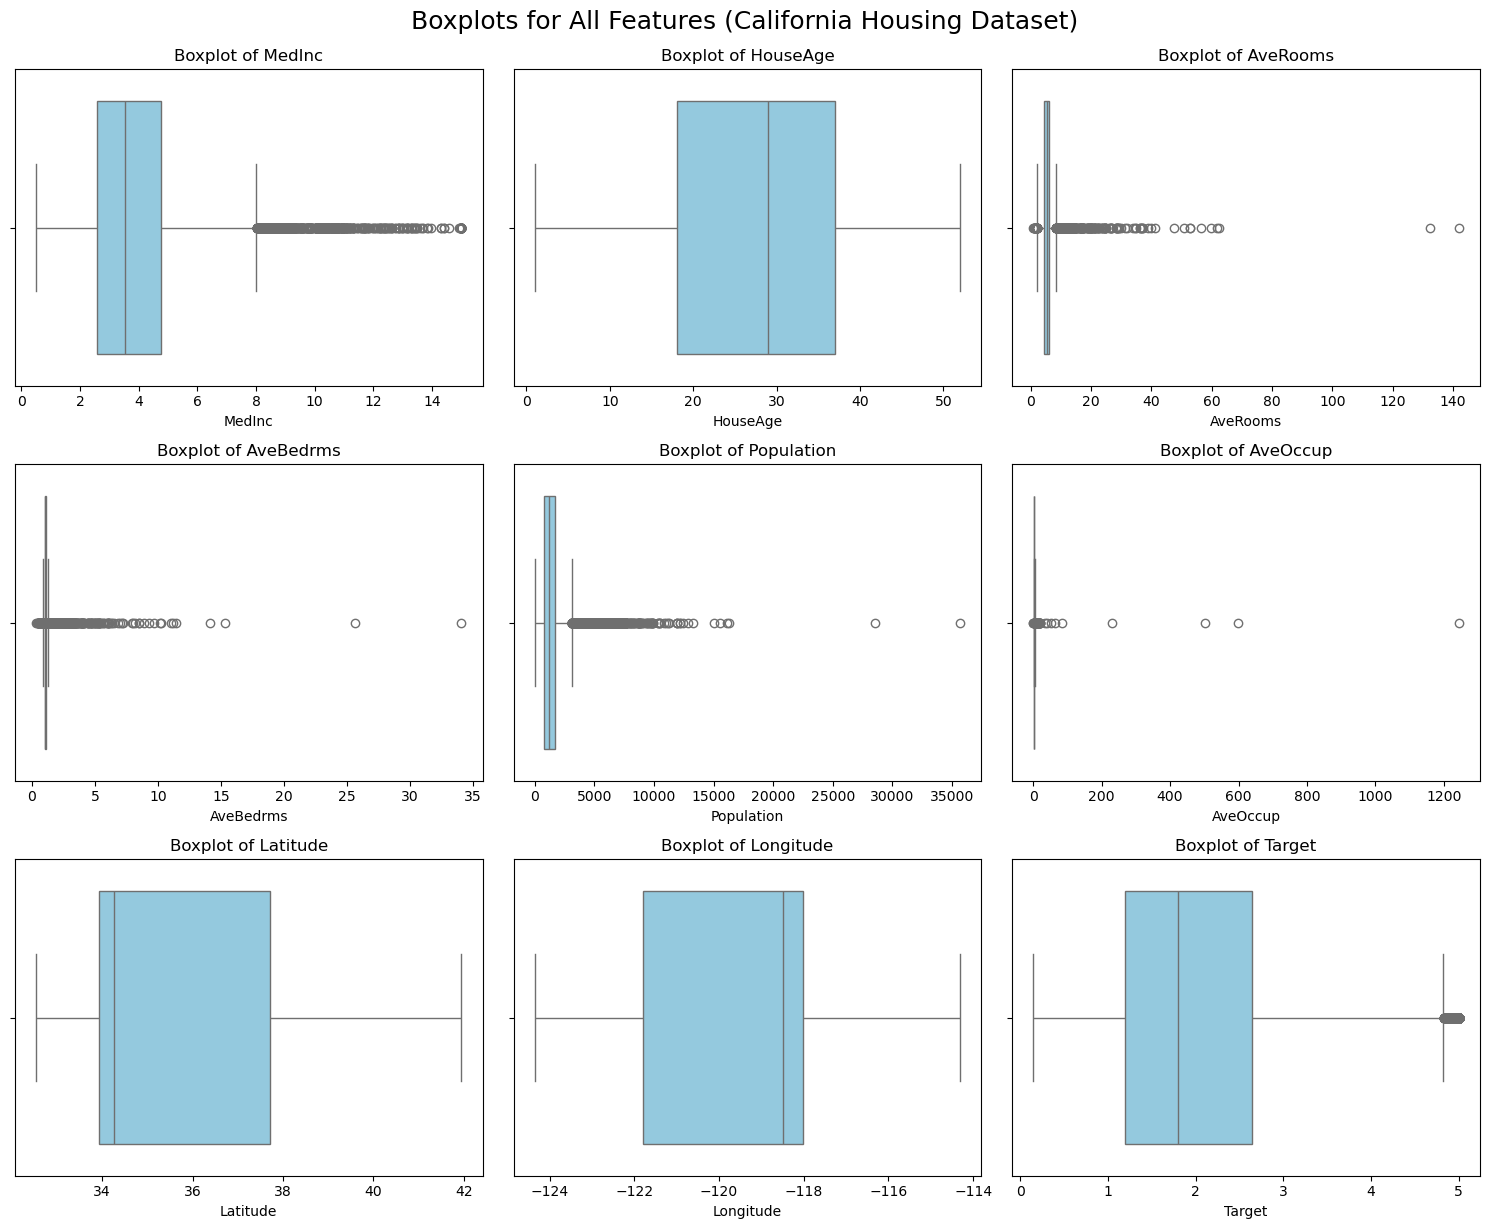

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 12))
columns = df.columns  

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.suptitle("Boxplots for All Features (California Housing Dataset)", fontsize=18, y=1.02)
plt.show()


In [33]:
#remove outliers
for col in df.columns:
    if col != 'Target':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]


In [34]:

# Splits the data into training (80%) and test (20%) sets
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


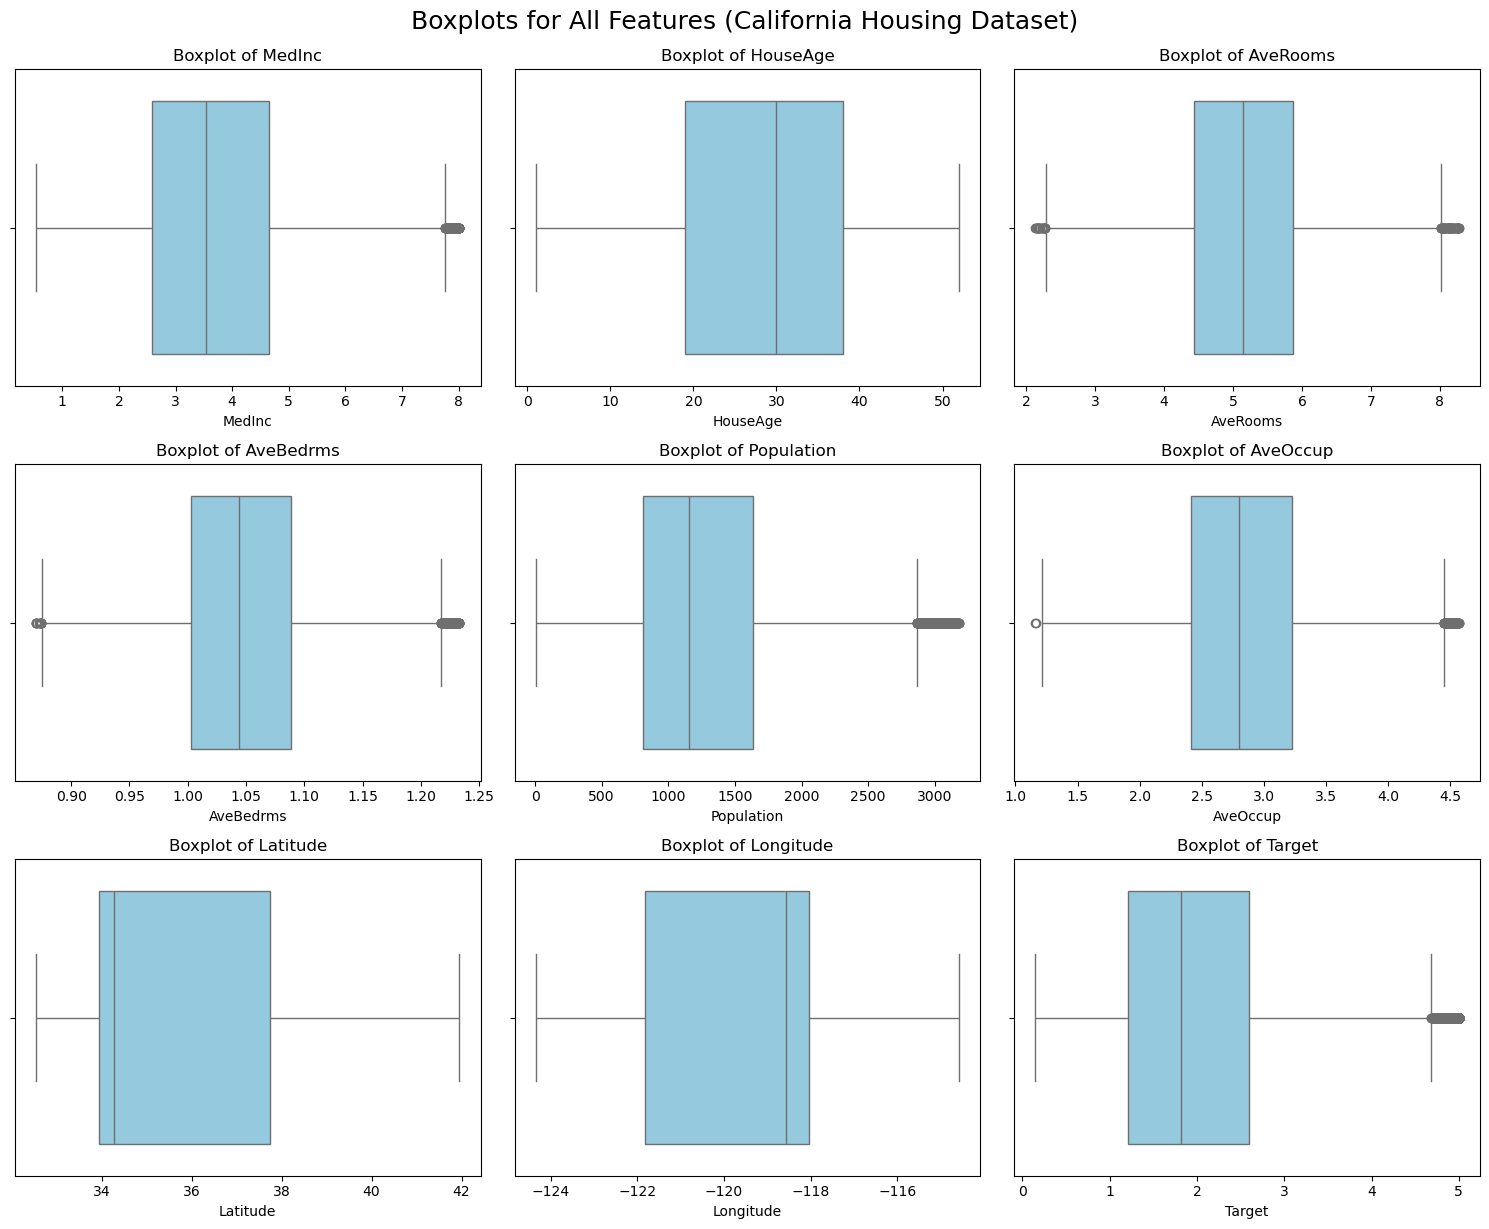

In [36]:
plt.figure(figsize=(15, 12))
columns = df.columns  

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.suptitle("Boxplots for All Features (California Housing Dataset)", fontsize=18, y=1.02)
plt.show()


In [37]:

# Build the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

#Uses Adam optimizer, mean squared error as loss, and mean absolute error as metric
#adam:  Updates the weights in a smart way during backpropagation so the model learns faster and more effectively
#mse: measures how far the predicted values are from the actual target values
#mae:  shows how much the predictions differ from the actual values on average 
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\Begad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Number of epochs to wait for improvement
    restore_best_weights=True,  # Restore the best model weights after training stops
    verbose=1               # To display training status
)

# Train the model with early stopping
#Splits training data into training and validation sets (80/20)
#Stops training if validation loss doesn't improve for 10 epochs

history = model.fit(
    X_train_scaled, 
    y_train, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=32,
    verbose=0,
    callbacks=[early_stopping]  # Add the callback here
)


Epoch 75: early stopping
Restoring model weights from the end of the best epoch: 65.


In [39]:

#  Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {mae:.4f}")


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.3271 - mae: 0.4034

Test Mean Absolute Error: 0.4019


In [40]:

# make a prediction
sample_input = X_test_scaled[:1]
prediction = model.predict(sample_input)
print(f"\nSample prediction: {prediction[0][0]:.4f}, Actual value: {y_test.iloc[0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Sample prediction: 1.3776, Actual value: 1.0420


In [41]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
R² Score: 0.7234


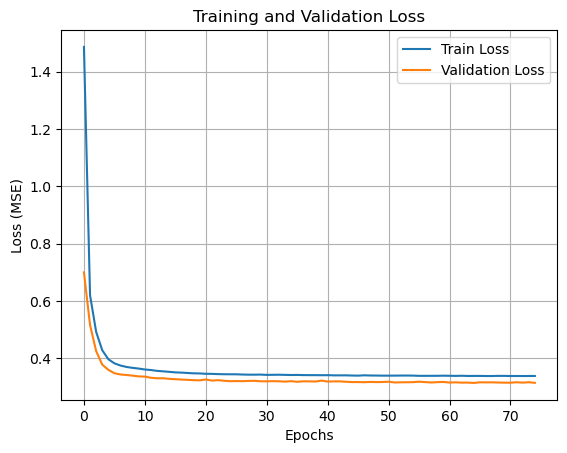

In [42]:

# Plotting training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()



# **PyTorch**



In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


In [44]:

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [45]:

# Split dataset into training, validation, and test sets
#Splits dataset into 60% train, 20% val, 20% test.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [46]:

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [47]:
#converts the NumPy arrays into PyTorch tensors so they can be used in training the model
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [48]:
#build the model
model = nn.Sequential(
    nn.Linear(8, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)


In [49]:

# Instantiate model, loss function, and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) #Uses MSE loss and Adam optimizer with a learning rate of 0.01


In [50]:

#Trains the model, calculates training and validation loss for each epoch
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    train_predictions = model(X_train_tensor)
    train_loss = criterion(train_predictions, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())


    # Validation step
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Train Loss = {train_loss.item():.4f}, Val Loss = {val_loss.item():.4f}')


Epoch 0: Train Loss = 5.4906, Val Loss = 5.2159
Epoch 10: Train Loss = 3.6574, Val Loss = 3.3512
Epoch 20: Train Loss = 1.5099, Val Loss = 1.3379
Epoch 30: Train Loss = 0.9868, Val Loss = 1.0053
Epoch 40: Train Loss = 0.7367, Val Loss = 0.7357
Epoch 50: Train Loss = 0.6967, Val Loss = 0.7049
Epoch 60: Train Loss = 0.6463, Val Loss = 0.6646
Epoch 70: Train Loss = 0.6155, Val Loss = 0.6350
Epoch 80: Train Loss = 0.5835, Val Loss = 0.5985
Epoch 90: Train Loss = 0.5575, Val Loss = 0.5717


In [51]:
model.eval()
with torch.no_grad():
    test_pred = model(X_test_tensor)
    test_loss = criterion(test_pred, y_test_tensor)
    print(f"Test MSE: {test_loss.item():.4f}")


Test MSE: 0.5657


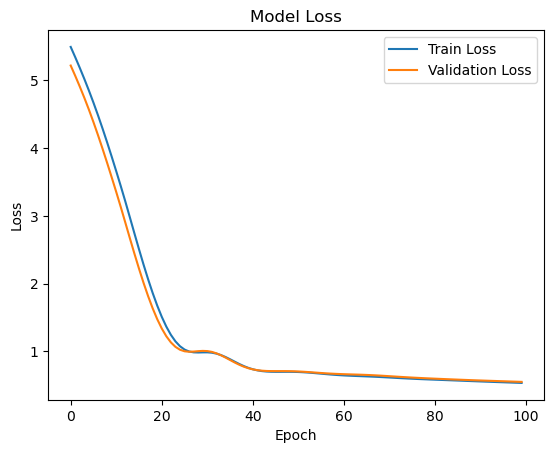

In [52]:

# Plot Training and Validation Loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
